In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import tree 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline 

## 예제 의사결정 트리 

In [5]:
example = np.array([[0, 2, 0, 0, 0],
                [0, 2, 0, 1, 0],
                [0, 1, 0, 0, 0],
                [0, 0, 1, 0, 1],
                [0, 1, 1, 1, 1],
                [1, 1, 0, 0, 1],
                [1, 0, 1, 0, 1],
                [1, 0, 1, 1, 0],
                [1, 1, 1, 0, 1],
                [1, 1, 0, 1, 0],
                [2, 2, 0, 0, 1],
                [2, 0, 1, 1, 1],
                [2, 1, 0, 1, 1],
                [2, 2, 1, 0, 1]])
exampleX = example[:,0:4]
exampleY = example[:,4]

In [7]:
# 정보 엔트로피 함수 정의 
# 뿌리 노드 선정 
def entropy(y): 
    values, counts = np.unique(y, return_counts=  True) 
    p = counts/counts.sum() 

    return -np.sum(p * np.log2(p)) 


total_entropy = entropy(exampleY) 
print(f"전체 데이터 엔트로피 : {total_entropy:.4f}") 

for feature_idx in range(exampleX.shape[1]): 
    feature_values= np.unique(exampleX[:, feature_idx])

    feature_entropy=  0 
    for value in feature_values: 
        idx = exampleX[:, feature_idx] == value 
        subset_y = exampleY[idx] 
        weight = len(subset_y) / len(exampleY) 
        subset_entropy = entropy(subset_y) 
        feature_entropy += weight * subset_entropy 
    info_gain = total_entropy - feature_entropy 
    print(f"Feature {feature_idx}의 정보 이득 : {info_gain:.4f}") 

# Feature 0의 정보이득 가장 높다(기상예보 : {'맑음' : 0, '비' : 1, '흐림' : 2})

전체 데이터 엔트로피 : 0.9403
Feature 0의 정보 이득 : 0.2467
Feature 1의 정보 이득 : 0.0292
Feature 2의 정보 이득 : 0.1518
Feature 3의 정보 이득 : 0.0481


In [9]:
맑음_ = example[np.where(example[:, 0] == 0)[0], :]

In [11]:
맑음_

array([[0, 2, 0, 0, 0],
       [0, 2, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1],
       [0, 1, 1, 1, 1]])

In [13]:
entropy(맑음_[:, 4])

0.9709505944546686

In [15]:
total_entropy = entropy(맑음_[:, 4])
맑음_X = 맑음_[:, 1:4] 
맑음_y = 맑음_[:, 4] 

for feature_idx in range(맑음_X.shape[1]): 
    feature_values= np.unique(맑음_X[:, feature_idx])

    feature_entropy=  0 
    for value in feature_values: 
        idx = 맑음_X[:, feature_idx] == value 
        subset_y = 맑음_y[idx] 
        weight = len(subset_y) / len(맑음_y) 
        subset_entropy = entropy(subset_y) 
        feature_entropy += weight * subset_entropy 
    info_gain = total_entropy - feature_entropy 
    print(f"Feature {feature_idx}의 정보 이득 : {info_gain:.4f}") 


Feature 0의 정보 이득 : 0.5710
Feature 1의 정보 이득 : 0.9710
Feature 2의 정보 이득 : 0.0200


In [17]:
비_ = example[np.where(example[:, 0] == 1)[0], :]

total_entropy = entropy(비_[:, 4])
비_X = 비_[:, 1:4] 
비_y = 비_[:, 4] 

for feature_idx in range(비_X.shape[1]): 
    feature_values= np.unique(비_X[:, feature_idx])

    feature_entropy=  0 
    for value in feature_values: 
        idx = 비_X[:, feature_idx] == value 
        subset_y = 비_y[idx] 
        weight = len(subset_y) / len(비_y) 
        subset_entropy = entropy(subset_y) 
        feature_entropy += weight * subset_entropy 
    info_gain = total_entropy - feature_entropy 
    print(f"Feature {feature_idx}의 정보 이득 : {info_gain:.4f}") 

Feature 0의 정보 이득 : 0.0200
Feature 1의 정보 이득 : 0.0200
Feature 2의 정보 이득 : 0.9710


In [19]:
흐림_ = example[np.where(example[:, 0] == 2)[0], :]

print(흐림_)

# 싹 다 1 분할 필요 없음 
# 그래도 해보면 

[[2 2 0 0 1]
 [2 0 1 1 1]
 [2 1 0 1 1]
 [2 2 1 0 1]]


In [21]:
total_entropy = entropy(흐림_[:, 4])
흐림_X = 흐림_[:, 1:4] 
흐림_y = 흐림_[:, 4] 
for feature_idx in range(흐림_X.shape[1]): 
    feature_values= np.unique(흐림_X[:, feature_idx])

    feature_entropy=  0 
    for value in feature_values: 
        idx = 흐림_X[:, feature_idx] == value 
        subset_y = 흐림_y[idx] 
        weight = len(subset_y) / len(흐림_y) 
        subset_entropy = entropy(subset_y) 
        feature_entropy += weight * subset_entropy 
    info_gain = total_entropy - feature_entropy 
    print(f"Feature {feature_idx}의 정보 이득 : {info_gain:.4f}") 

Feature 0의 정보 이득 : -0.0000
Feature 1의 정보 이득 : -0.0000
Feature 2의 정보 이득 : -0.0000


## Quiz

In [47]:
import pandas as pd 

df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [49]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [51]:
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [53]:
df['Sex'] = df['Sex'].replace({'F' : 2 , 'M' : 1 })
df['BP'] = df['BP'].replace({'HIGH' : 2, 'NORMAL' : 1 , 'LOW' : 0}) 
df['Cholesterol'] = df['Cholesterol'].replace({'HIGH' : 2, 'NORMAL' : 1 , 'LOW' : 0})
df['Drug'] = df['Drug'].replace({
    'drugA' : 1, 
    'drugB' : 2, 
    'drugC' : 3 , 
    'drugX' : 4, 
    'drugY' : 5 
})

In [55]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']

In [57]:
X_train ,X_test , y_train, y_test = train_test_split(X,y , test_size=  0.2)

In [59]:
clf = DecisionTreeClassifier(criterion = 'entropy' , 
                            max_depth = 4, 
                            random_state = 0)

In [61]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

<Figure size 1600x800 with 0 Axes>

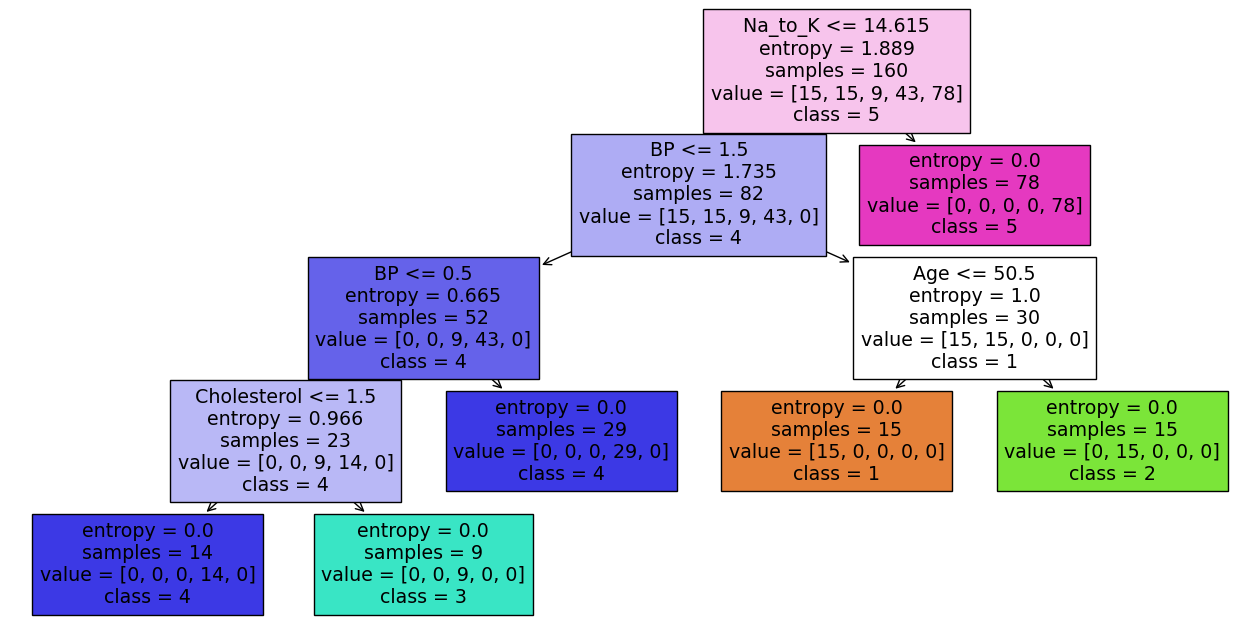

In [63]:
plt.figure(figsize = (16, 8)) 
tree.plot_tree(clf, feature_names = ['Age', 'Sex', 'BP', 
                                     'Cholesterol', 'Na_to_K'], 
               class_names = [ '1', '2', '3', '4', '5'], 
               filled = True) 
plt.show()

In [64]:
y_pred = clf.predict(X_test)
print("Accuracy (Tree):", accuracy_score(y_test, y_pred))

Accuracy (Tree): 0.975
